In [1]:
import pandas as pd


df = pd.read_csv('level_progress.csv')
df.head(10)

,event_datetime,player_id,level_number,status,session_id
0,2020-11-28 21:00:24.958000,00020eac3d7e4f058b87eac1a9a85c25,6,complete,6ddf006b807e451eb4706d6d98a049b6
1,2020-11-27 22:03:03.048000,00020eac3d7e4f058b87eac1a9a85c25,2,start,3ba98db705f2aa0bc406441a61c23b3c
2,2020-11-26 14:53:09.344000,002188c0bc476f356f4c3b74e5cc66c8,1,start,25cf292a8f1d3da01df8371276502edf
3,2020-12-03 11:43:26.582000,00576ef3617e6bbbabfa0b1090e4122d,1,start,21fd6a7db53a9220574563ac8a8c8b58
4,2020-12-04 14:23:07.448000,00576ef3617e6bbbabfa0b1090e4122d,7,start,358b9ab5c1c0f08bc7def310411eb90f
5,2020-12-02 20:11:40.721000,004b7862e44e970d3f1ed9d53dc5e03e,9,start,23d421f1f25256618be93ad9e6d85f62
6,2020-11-25 18:41:54.555000,005408c722a113f529a8ae46f97df6a5,0,complete,d89440e94ac880387d6029d3a9868297
7,2020-11-25 19:33:24.458000,005408c722a113f529a8ae46f97df6a5,5,start,f7ca1989a08f2a2143cc68f64a68cbfa
8,2020-12-08 15:57:24.864000,0089666ada6b828781c18f9f99818aca,1,start,8726481d5da6de58a6be5fed2513f522
9,2020-11-26 19:11:28.495000,005b6796340da5b9fe70dd03979bd482,5,start,eba86abcccafab956de25b52dbe1a773


## Check for Distinct and Null values

In [2]:
print('Distinct levels are:\n', sorted(df['level_number'].unique())) # Unique levels
print('\nDistinct Status are:\n', sorted(df['status'].unique())) # Unique status
print('\n Check if any Null values are present:\n', df.isnull().values.any()) # check if any null in the data

Distinct levels are:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Distinct Status are:
 ['complete', 'fail', 'start']

 Check if any Null values are present:
 False


## Pull only the rows containing Fail as the status.

In [3]:
print('Length of the Dataset is: ', len(df))
level_fail = df[df['status'] == 'fail']
print('Total number of rows having status as fail: ', len(level_fail))
level_fail.head()

Length of the Dataset is:  55826
Total number of rows having status as fail:  4146


,event_datetime,player_id,level_number,status,session_id
37,2020-11-18 09:10:58.541000,000948918c5ed8e1dd02e3c8fcbcae8e,4,fail,d2ccda83d3df92b31d37189e1b2a078b
47,2020-11-22 16:28:43.209000,005fde66a4f93e41b628fa76290fff6b,3,fail,8e365c77bb39dddcd2860c3ed9f36c71
57,2020-11-21 06:55:10.842000,00b3c8d004f34341f938ce84bedc6cdd,4,fail,79038897ae864fdeaf4263b1abd129e2
71,2020-11-20 21:30:34.097000,0094f5714dd17f0f0f3f45b9cd40ed23,8,fail,bad109a7bdb5a2607093daefdd72e722
76,2020-11-22 09:24:38.748000,0035ff83e7e08d77a7808bd150147927,4,fail,547e380d14c18fd714e0d3b0999c6a77


In [4]:
print('\nDistinct levels at which players failed:\n',
      sorted(level_fail['level_number'].unique()))


Distinct levels at which players failed:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 38, 39, 42, 44]


In [5]:
print('As per Basic analysis using mode calculation, most of the users fail at Level: ',
      level_fail['level_number'].mode().values)

As per Basic analysis using mode calculation, most of the users fail at Level:  [3]


In [6]:
print(level_fail['level_number'].value_counts())

3     865
5     537
4     475
6     400
8     255
7     255
9     157
11    147
10    127
13    111
12    109
14    105
2      91
17     56
16     55
15     53
23     39
19     39
0      37
22     37
18     36
20     21
1      20
21     18
26     15
24     11
25     10
29     10
27      9
32      9
28      9
30      7
31      6
33      5
35      3
42      2
38      2
39      1
44      1
37      1
Name: level_number, dtype: int64


## Verify if above Analysis is true by counting distinct players who failed at each level.

In [7]:
# Pull only player_id and level_number from the dataframe.
level_fail_cleaned = level_fail[['player_id', 'level_number']]
print('Length of the cleaned data is: ', len(level_fail_cleaned))
level_fail_cleaned.head()

Length of the cleaned data is:  4146


,player_id,level_number
37,000948918c5ed8e1dd02e3c8fcbcae8e,4
47,005fde66a4f93e41b628fa76290fff6b,3
57,00b3c8d004f34341f938ce84bedc6cdd,4
71,0094f5714dd17f0f0f3f45b9cd40ed23,8
76,0035ff83e7e08d77a7808bd150147927,4


In [8]:
# Distinct players failed per level
results = level_fail_cleaned.groupby(by='level_number', as_index=False).agg(
    {'player_id': pd.Series.nunique})
results.columns = ['level_number', 'player_count']
results = results.sort_values('player_count', ascending=False)
print('Level at which most of the players failed:\n', 
      results.sort_values('player_count', ascending=False).iloc[0])
results.head()

Level at which most of the players failed:
 level_number      3
player_count    687
Name: 3, dtype: int64


,level_number,player_count
3,3,687
5,5,396
4,4,382
6,6,303
7,7,197


## Based on the above analysis, and the Graph shown below we can conclude that 

## Level 3 of this game is where most of the players tend to fail.

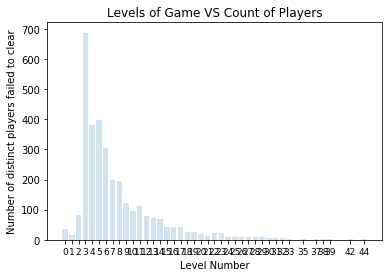

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


x = results['level_number']
y = results['player_count']
plt.bar(x, y, alpha=0.2)
plt.xticks(x, [str(i) for i in x])
plt.ylabel('Number of distinct players failed to clear')
plt.xlabel('Level Number')
plt.title('Levels of Game VS Count of Players')
plt.tick_params(axis='x', which='major', labelsize=9)